# Correlation Heatmap of Running Metrics

In [1]:
import pandas as pd
import seaborn as sns
import hvplot.pandas
import panel as pn
from hvplot.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

pn.extension()

In [2]:
df_run_heatmap = pd.read_csv('./csv/df_run_heatmap.csv')

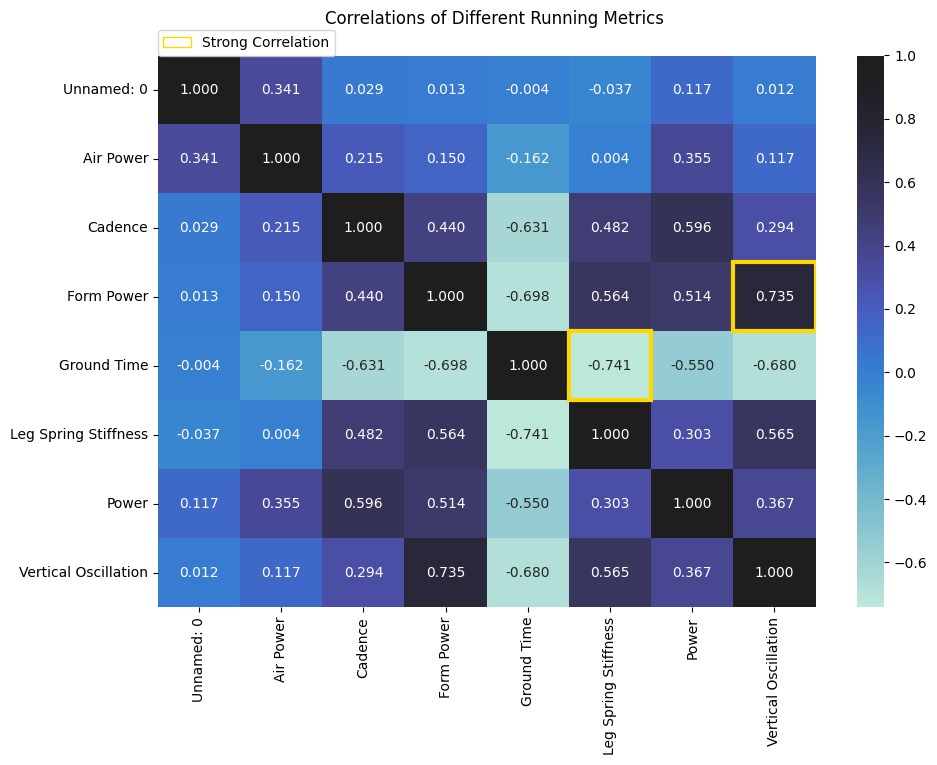

In [3]:
corr = df_run_heatmap.corr()
golden_patch = mpatches.Patch(edgecolor='gold', facecolor='none', label='Strong Correlation')

fig, ax = plt.subplots(figsize=(10,8))

ax_heat = sns.heatmap(data=corr, ax=ax, annot=True, center=True, fmt='.3f')

## highlight cells
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if j > i:
              val = corr.iloc[i, j]
              if abs(val) >= 0.7 and i != j:
                     ax_heat.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='gold', lw=3))



plt.suptitle('Correlations of Different Running Metrics')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.legend(handles=[golden_patch],loc=(0,1))
plt.show()